I used ChatGPT to help with plotting and analyzing the data for my project.



In [ ]:
%pip install pandas matplotlib


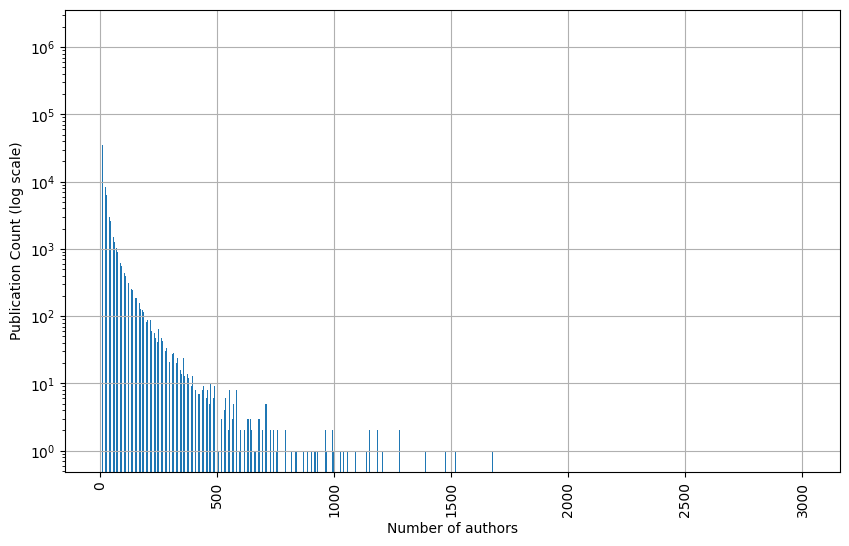

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('vis.csv') 
plt.figure(figsize=(10, 6))
plt.yscale('log')
plt.bar(data['number_publications'], data['number_authors'], width=0.5)
plt.xlabel('Number of authors')
plt.ylabel('Publication Count (log scale)')
plt.xticks(rotation=90)
plt.grid(True)
plt.savefig('publication_count_plot.pdf')
plt.show()


According to the plot, we can notice that the majority of authors have a few publication while a lot of authors does not have that many publication . The distribution of  publications  seems to look like an expontential distribution and the dataset of (publication , authors ) is not uniform 

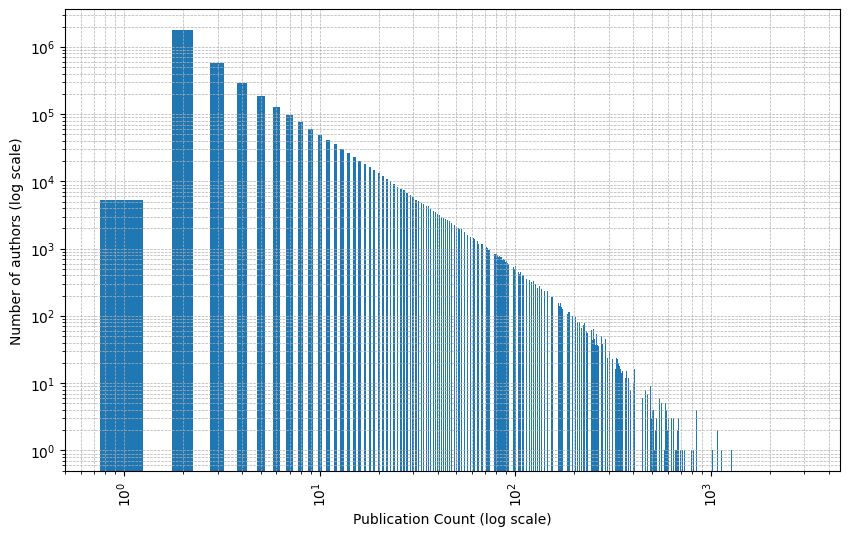

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('vis.csv') 
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.bar(data['number_publications'], data['number_authors'], width=0.5)
plt.xlabel('Publication Count (log scale)')
plt.ylabel('Number of authors (log scale)')
plt.xticks(rotation=90)
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.savefig('publication_count_plot.pdf')
plt.show()


Then I transformed the data to log-log scale to have a better vision on the relation between the log of the number of authors and the log of the number of publications . the output is more linear than the previous plot. 

In [ ]:
%pip install scikit-learn matplotlib


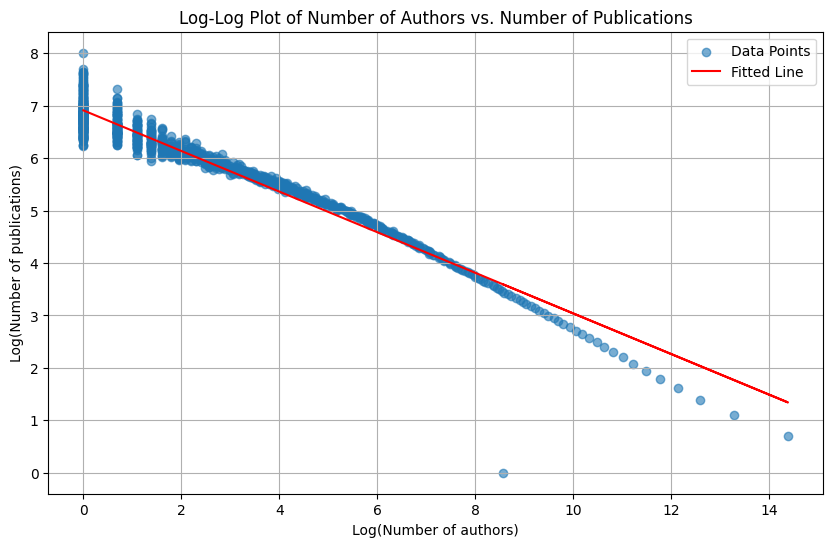

Estimated exponent (slope): -0.3872425456228905
Correlation coefficient: -0.9715699541109424


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

data = pd.read_csv('vis.csv') 
data['log_authors'] = np.log(data['number_authors'])
data['log_publications'] = np.log(data['number_publications'])

X = data['log_authors'].values.reshape(-1, 1)
y = data['log_publications'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(data['log_authors'], data['log_publications'], alpha=0.6, label='Data Points')
plt.plot(data['log_authors'], y_pred, color='red', label='Fitted Line')
plt.xlabel('Log(Number of authors)')
plt.ylabel('Log(Number of publications)')
plt.title('Log-Log Plot of Number of Authors vs. Number of Publications')
plt.legend()
plt.grid(True)
plt.savefig('log_log_power_law_plot.pdf')
plt.show()

print(f'Estimated exponent (slope): {model.coef_[0]}')
print(f'Correlation coefficient: {np.corrcoef(data["log_authors"], data["log_publications"])[0, 1]}')


The analysis of the relationship betwwen the number of authors and the number of publications revels that as the number of 
authors increases , the increase in publication count is at slower rate  . This is indicated by the estimated exponent (slope) of approximately -0.387
The correlation coefficient is showing a negative linear relationship in the loglog plot . => the increasing of publication number is not directly proportional  with the increase of the total number of the authors 